In [40]:
import pandas as pd
import glob
from functools import reduce

# '프로젝트1/data/y_rate_1' 폴더 내의 모든 '.csv' 파일을 찾습니다.
csv_files = glob.glob('../data/y_morning/*.csv')

# 모든 CSV 파일을 데이터프레임으로 읽고 리스트에 저장합니다.
dfs = [pd.read_csv(file, index_col=0) for file in csv_files]

# 모든 데이터프레임을 인덱스를 기준으로 합칩니다. 'outer'는 모든 인덱스를 유지합니다.
merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)



In [41]:
merged_df.set_index('date',inplace=True)
merged_df.index = pd.to_datetime(merged_df.index, format="%Y%m%d")

In [42]:
merged_df=merged_df.dropna()

In [43]:
merged_df

,y_rate_0910,y_rate_0915,y_rate_0920,y_rate_0925,y_rate_0930,y_rate_0935,y_rate_0940,y_rate_0945,y_rate_0950,y_rate_0955,y_rate_1000,y_rate_1005,y_rate_1010,y_rate_1015,y_rate_1020,y_rate_1025,y_rate_1030
date,,,,,,,,,,,,,,,,,
2018-10-01,54,32,5,0,-13,-112,-108,-121,-130,-126,-144,-135,-117,-103,-108,-112,-85
2018-10-02,23,-4,32,27,36,36,54,59,68,72,59,41,27,-22,-54,-58,-54
2018-10-04,-108,-166,-153,-193,-193,-220,-225,-256,-256,-243,-243,-270,-319,-315,-351,-333,-351
2018-10-05,-27,-45,9,49,72,85,81,54,22,31,49,49,27,27,31,31,-5
2018-10-08,18,23,41,59,86,77,81,72,99,108,99,86,99,194,162,176,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,-35,-110,-150,-220,-195,-210,-265,-280,-300,-340,-300,-300,-280,-310,-330,-310,-295
2023-10-23,-25,20,75,-40,-60,-60,5,55,0,5,25,40,0,-10,-20,55,45
2023-10-24,-50,-70,-60,-150,-110,-115,-115,-155,-165,-195,-175,-210,-210,-235,-250,-290,-395


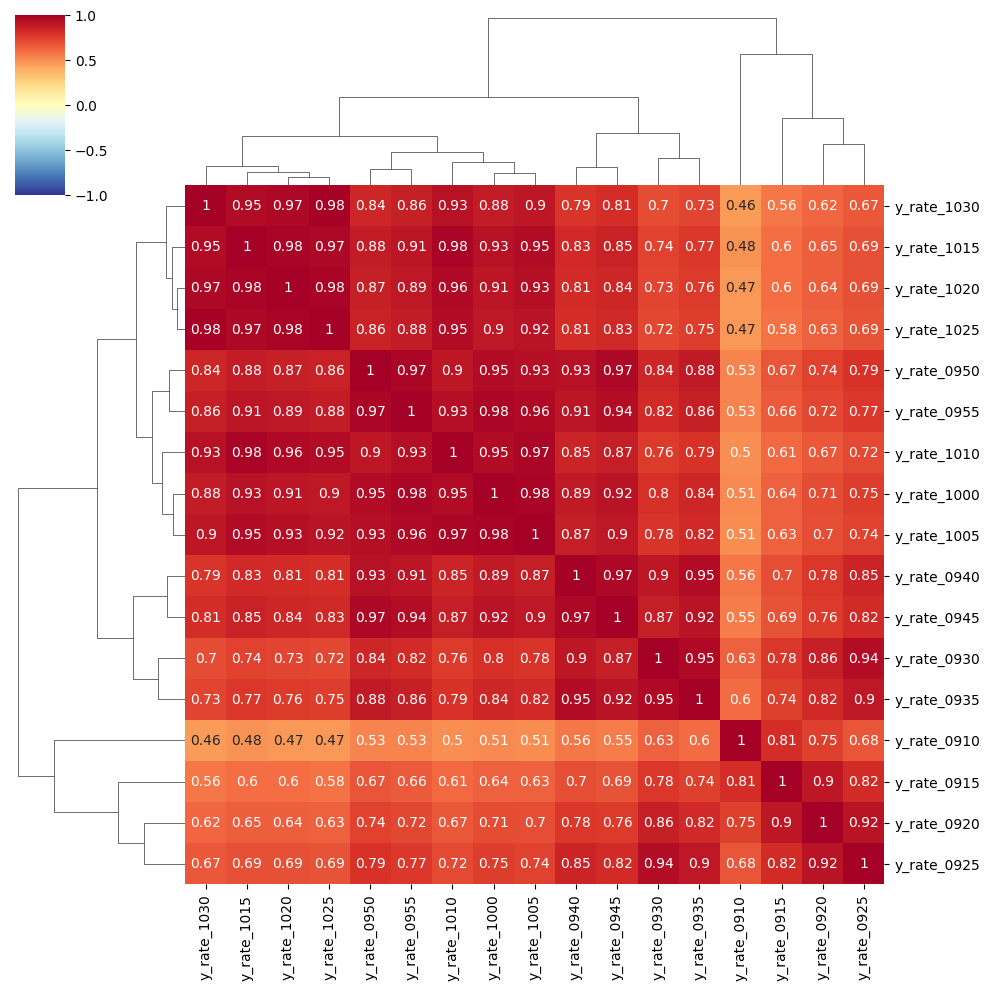

In [44]:

import seaborn as sns

df = merged_df.corr()

sns.clustermap(df, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )

In [57]:
df_1day = pd.read_csv('../data/y/X1_kodex(1d).csv',index_col=0)
# 인덱스를 DatetimeIndex로 변환
df_1day.index = pd.to_datetime(df_1day.index , format='%Y%m%d')
df_1day = df_1day[['open']]

In [58]:
df_1day = pd.merge(df_1day, merged_df, right_index=True, left_index=True, how='inner')

In [59]:
df_1day.drop(columns='y_rate_1030',inplace=True)
df_1day.drop(columns='y_rate_1025',inplace=True)
df_1day.drop(columns='y_rate_1020',inplace=True)
df_1day.drop(columns='y_rate_1015',inplace=True)
df_1day.drop(columns='y_rate_1010',inplace=True)
df_1day.drop(columns='y_rate_1005',inplace=True)
df_1day.drop(columns='y_rate_1000',inplace=True)
df_1day.drop(columns='y_rate_0955',inplace=True)
df_1day.drop(columns='y_rate_0950',inplace=True)
df_1day.drop(columns='y_rate_0945',inplace=True)
df_1day.drop(columns='y_rate_0940',inplace=True)


In [69]:
df_1day_corona = df_1day[250:900]

<Axes: >

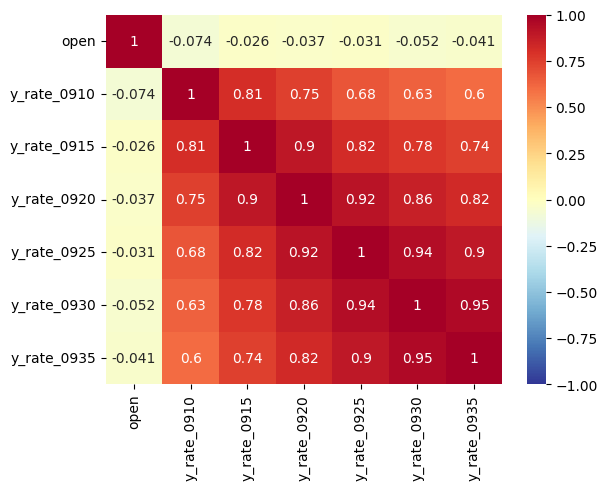

In [62]:
import seaborn as sns

df_corrr = df_1day.corr()

sns.heatmap(df_corrr, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )


<Axes: >

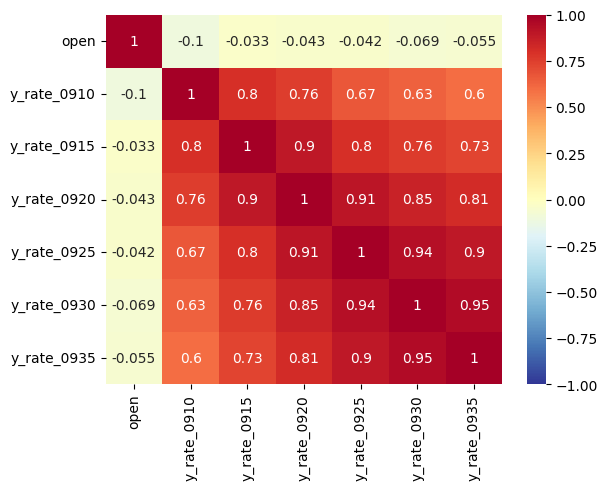

In [70]:
import seaborn as sns

df_corrr = df_1day_corona.corr()

sns.heatmap(df_corrr, 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )